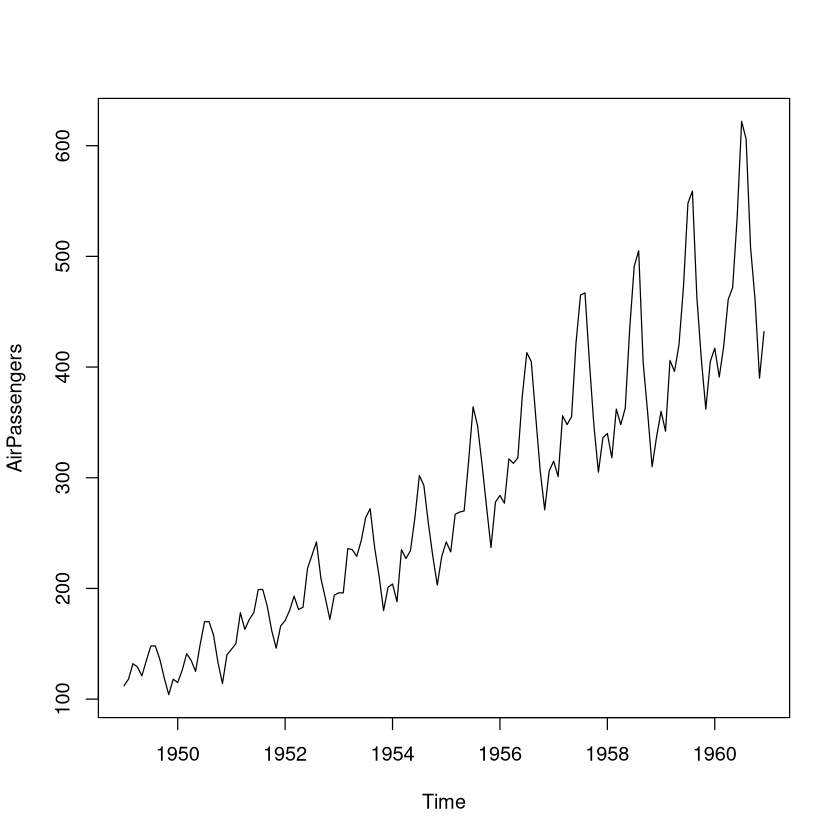

In [115]:
plot(AirPassengers)

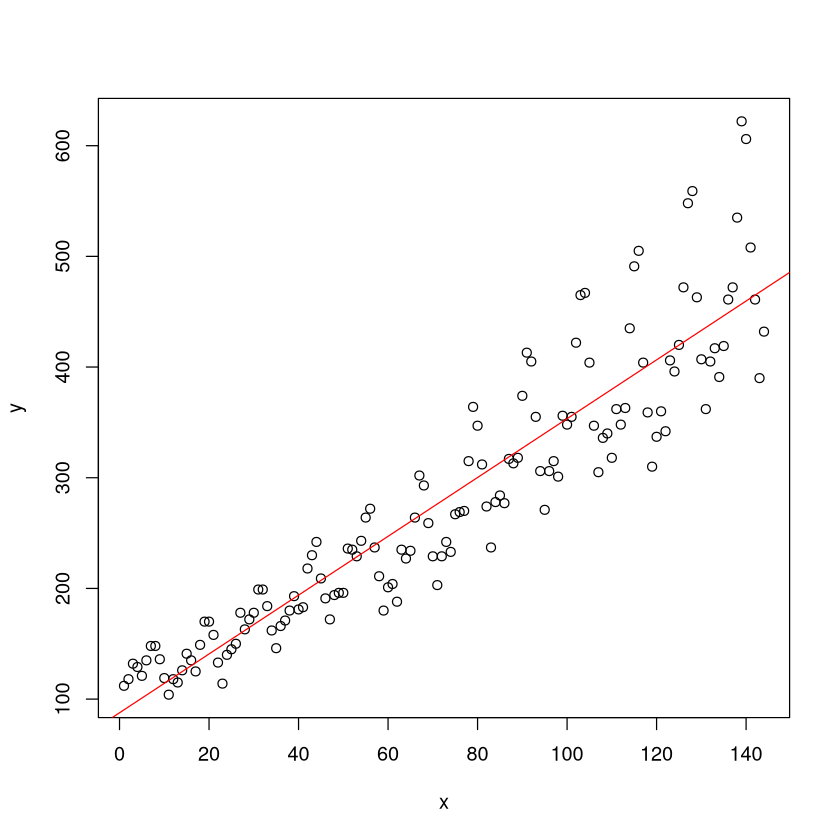

In [116]:
x <- 1:144
y <- as.numeric(AirPassengers)
line = lm(formula=y~x)
plot(x,y)
abline(line, col = "red")

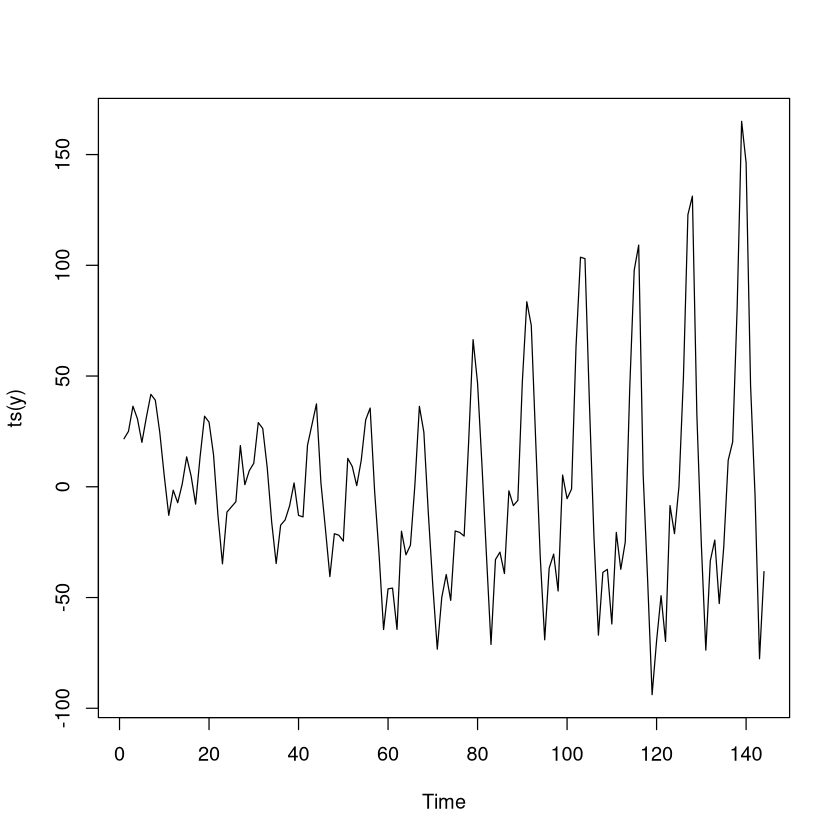

In [117]:
# De-trend
trendline_vals <- predict(line)
y = y - trendline_vals
plot(ts(y))

In [118]:
adj <- y[10:144]# Start near first ~0 value

In [50]:
# Remove increasing variance trend
for (i in seq(5, 144, by = 5)){
    newvals = c(adj[i],adj[i-1],adj[i-2],adj[i-3],adj[i-4])
    newvals <- scale(newvals)
    adj[i] <- newvals[1]
    adj[i-1] <- newvals[2]
    adj[i-2] <- newvals[3]
    adj[i-3] <- newvals[4]
    adj[i-4] <- newvals[5]
}

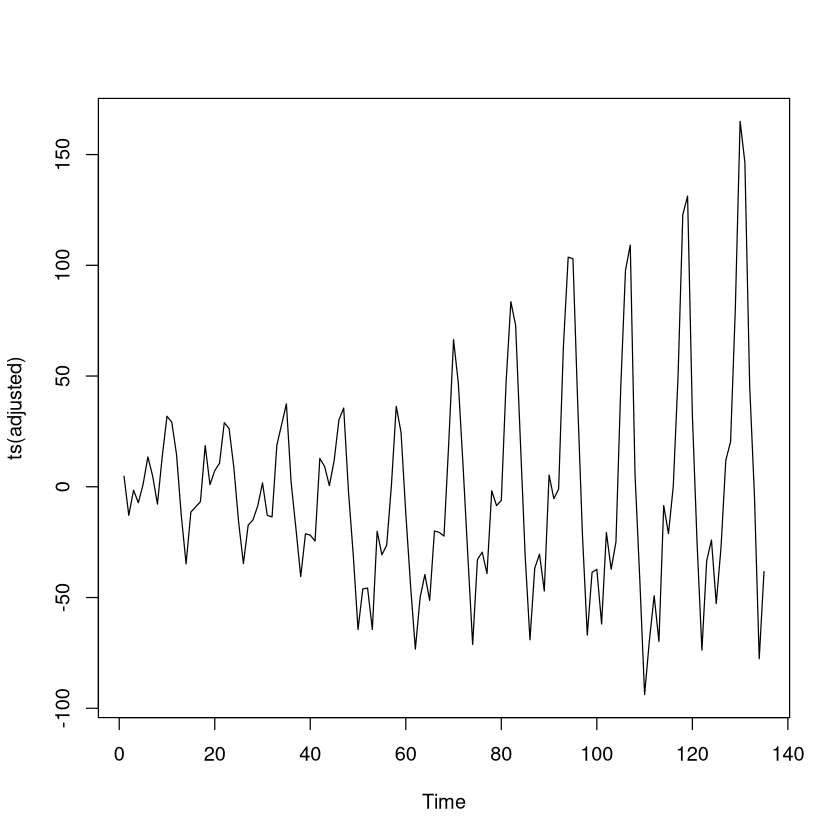

In [119]:
adjusted <- na.omit(adj)
plot(ts(adjusted))

In [120]:
model <- arima(ts(adjusted), order <- c(1,1,1))
model


Call:
arima(x = ts(adjusted), order = order <- c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.4818  0.8704
s.e.   0.1162  0.0706

sigma^2 estimated as 1016:  log likelihood = -654.29,  aic = 1314.59

In [125]:
# Forecast future
zz = numeric(100)
e <- rnorm(100)
for (i in 2:100){
    zz[i] <- -1*e[i] + 0.2462*x[i-1] + 0.0033
}

In [126]:
zz <- scale(zz)

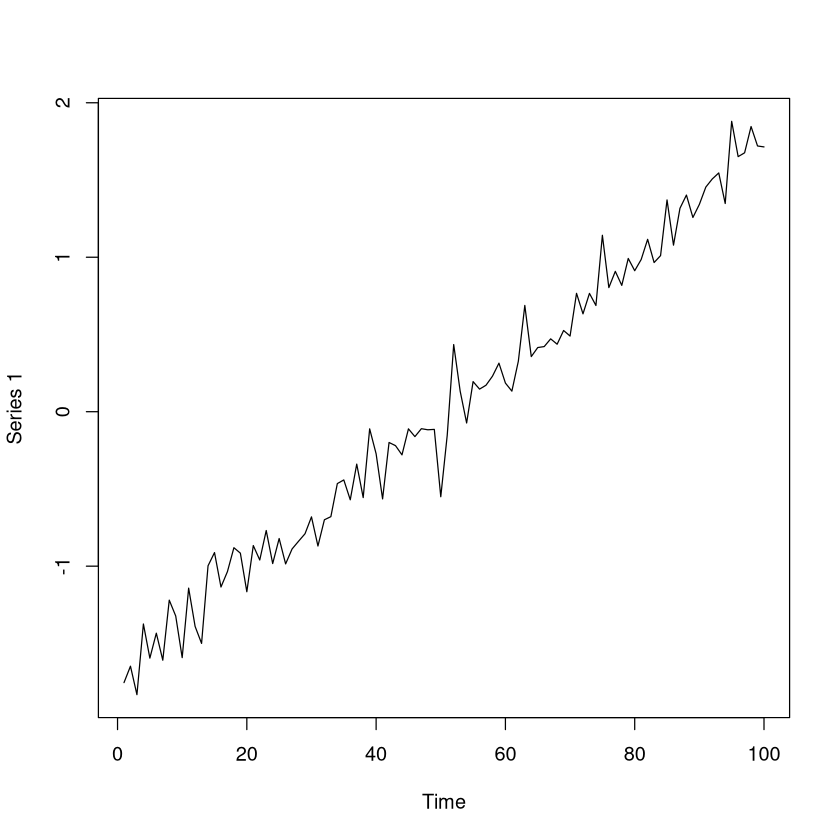

In [127]:
plot(ts(zz))